# クラスタリング

今までの学習は、教師あり学習と呼ばれ正解ラベルがあるデータを分類するものでした。

改めて、クラス分類とクラスタリングの違いを説明します。

クラス分類は「教師あり学習」、クラスタリングは「教師なし学習」

クラス分類では事前に決まっている分類を新しいデータに当てはめて考える手法で、

クラスタリングは、データの中で似たものの集まりを見つける手法でした。

今回は、教師なし学習のクラスタリングについて学習します。

クラスタリングとは、正解ラベルがないデータに対しいくつかのグループ（クラスタ）に分けるものです。

クラスタリングは、代表的な教師なし学習手法で、多変量のサンプルデータが大量にある場合に、

どういった傾向のクラスタに分割できるかが不明な場合に、

クラスタリングすることで、全体のサンプルの中で

クラスタを分割することが出来る手法になります。

例として、顧客のセグメント化や遺伝子の発現パターンなどがあります。

# K-meansとは

K-meansとは、クラスタリングのアルゴリズムの一種で実行速度が速く拡張性があるという特徴があります。

K-meansのKはクラスタの数を示すハイパーパラメータです。

Kは必ずデータの数より小さい値に設定します。

なぜ「Kがデータは数より少なく設定するのか」ですが、クラスの数＜データ数として、分類をするためです。

決まった値がなく不明瞭ですが、様々な求める手法があります。

# K-meansのアルゴリズム

1. ランダムな位置にクラスタの重心(中心点)を定める
2. それぞれのクラスタの重心と各点の距離を計算
3. 各点を一番近いクラスタに割り当てる
4. 2と3を繰り返し、設定した回数繰り返すか、クラスタの変更がなくなったら終了

# K-meansの問題点
K-meansの問題点として、初期値によって局所最適解に陥ることがある。
解決策として、初期値を変えて何度も実行することがあげられる

# K-meansの実装例

[[1 1]
 [2 3]
 [3 2]
 [1 2]
 [5 8]
 [6 6]
 [5 7]
 [5 6]
 [6 7]
 [7 1]
 [8 2]
 [9 1]
 [7 1]
 [9 3]]


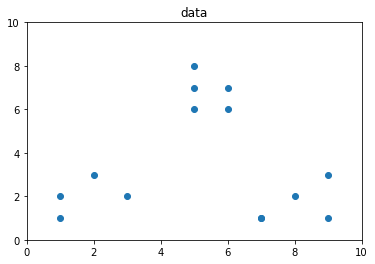

In [7]:
#クラスタリングするデータを作成
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2 = np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])

# 1次元目をx1, 2次元目をx2とする行列を作成
x = np.c_[x1, x2]
#
print(x)

# x軸とy軸の幅を設定する
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('data')

# 散布図を作成
plt.scatter(x1, x2)

[2 2 2 2 1 1 1 1 1 0 0 0 0 0]


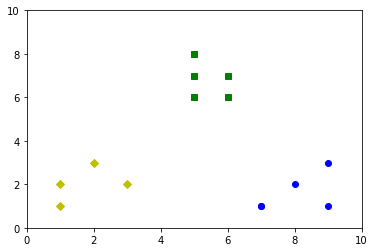

In [10]:
# 今回はkを3にして学習する
kmeans = KMeans(n_clusters = 3)
kmeans_model = kmeans.fit(x)
print(kmeans_model.labels_)

"""
パラメータのn_clustersはクラスタ数を示しています。
実行すると、それぞれのデータがどのクラスタに属しているか出力されます。
[0 0 0 0 2 2 2 2 2 1 1 1 1 1]
数値ではわかりづらいので可視化してみてみましょう。
"""
# 色とマーカーの形を設定
colors = ['b', 'g', 'y']
markers = ['o', 's', 'D']

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color = colors[l], marker = markers[l], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
plt.show()

# まとめ
今回は、教師なし学習のクラスタリングとその手法のK-meansを学習しました。
K-meansは設定したKの数にデータを分ける学習で、顧客のセグメント化などに使われます。

# 演習問題
1）手書きで書かれた数字をクラスタリングによって分類してみましょう。

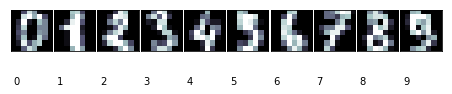

In [9]:
#まずはデータのロードと図の表示
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

%matplotlib inline

digits = load_digits()
data = scale(digits.data)

def print_digits(images, y, max_n=10):
    fig = plt.figure(figsize = (12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    
    i=0
    while i < max_n and i < images.shape[0]:
        p=fig.add_subplot(20, 20, i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0, 14, str(y[i]))
        i = i+1

print_digits(digits.images, digits.target, max_n=10)

In [27]:
#学習データとテストデータを分ける
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size = 0.25, random_state=42)
n_smple, n_features = x_train.shape
n_digits=len(np.unique(y_train))
labels = y_train
print("images_train:", images_train.shape)
print("images_test:", images_test.shape)
print("x_train:",x_train.shape)
print("x_test:", x_test.shape)
print("y_train:",y_train.shape)
print("y_test:", y_test.shape)

images_train: (1347, 8, 8)
images_test: (450, 8, 8)
x_train: (1347, 64)
x_test: (450, 64)
y_train: (1347,)
y_test: (450,)


あらかじめ y_train, y_testを作る理由に関して記述致します。

K-means自体は教師なし学習ですが、学習したモデル自体を評価するためにラベルが必要です。

そのため、y(ラベル）は必要です。

images_trainについてもですが、これは、train_test_split関数を参考にして見てください。

この関数は与えられたデータをデータ同士の対応関係を維持したまま、train, testに分割してくれます。

通常は、この関数に、x(データ), y(ラベル）のみを入れて、分割し、

x_train, x_test, y_train, y_testを得ますが、

今回は対応するimage(画像）も分割したかったので、それを分化して、

images_train, images_testを得ています。 

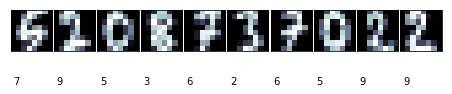

In [32]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 10)
kmeans_model = kmeans.fit(x_train)

print_digits(images_train, kmeans.labels_, max_n = 10)

y_pred = kmeans.predict(x_test)


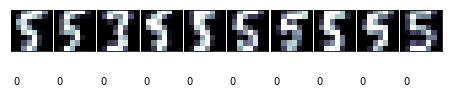

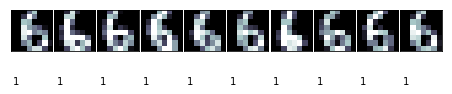

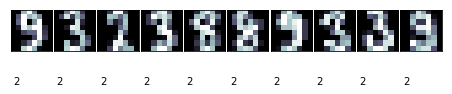

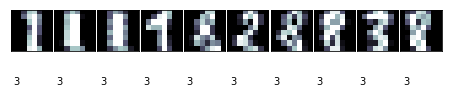

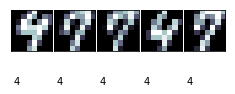

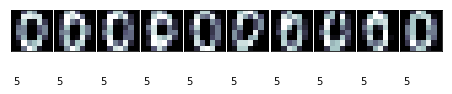

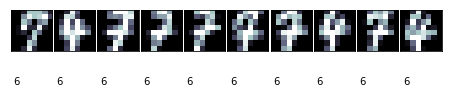

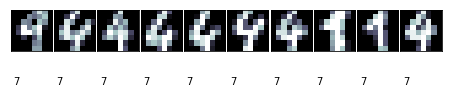

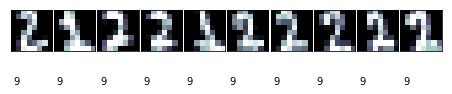

In [33]:
# 予測した図を表示する
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)

for i in range(10):
    print_cluster(images_test, y_pred, i)

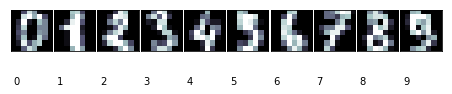

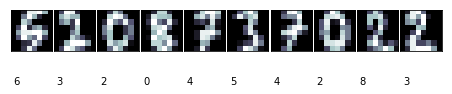

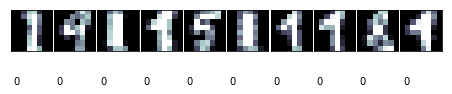

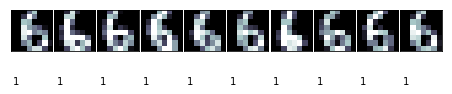

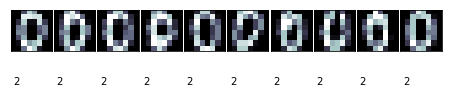

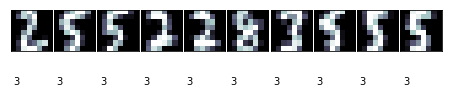

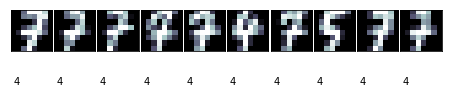

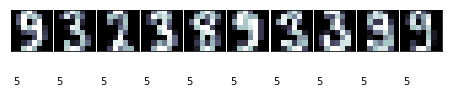

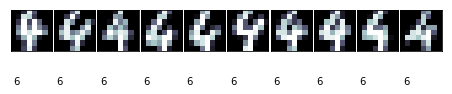

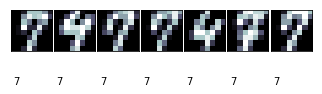

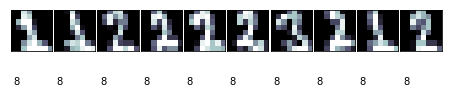

In [34]:
# 演習問題回答
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

def print_digits(images, y, max_n=10):
    fig = plt.figure(figsize = (12,12))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

    i=0
    while i < max_n and i < images.shape[0]:
        p=fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0,14,str(y[i]))
        i=i+1

print_digits(digits.images, digits.target, max_n=10)



from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(
        data, digits.target,digits.images,test_size=0.25,random_state=42)

n_samples, n_features = x_train.shape
n_digits=len(np.unique(y_train))
labels = y_train


from sklearn import cluster
clf = cluster.KMeans(n_clusters=10)
clf.fit(x_train)

print_digits(images_train, clf.labels_,max_n=10)

y_pred = clf.predict(x_test)


def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images,y_pred,max_n=10)


for i in range(10):
    print_cluster(images_test,y_pred,i)  